In [69]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd


In [70]:
%matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')
font = {'weight': 'bold',
        'size':   16}
plt.rc('font', **font)

## Load in CDC Data - National & State

In [3]:
df_national = pd.read_csv("data/National_Custom_Data.csv", thousands =',')

In [71]:
df_states = pd.read_csv("data/State_Custom_Data.csv", thousands =',')

## National Data Initial EDA

In [5]:
df_national.head()

,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,THRESHOLD,BASELINE,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
0,National,NaN,All,2019-20,40,5.7,5.3,5.2,16,2703,52452,> 100%
1,National,NaN,All,2019-20,41,5.7,5.4,5.3,16,2769,52860,> 100%
2,National,NaN,All,2019-20,42,5.8,5.5,5.5,18,2976,54129,> 100%
3,National,NaN,All,2019-20,43,5.9,5.6,5.6,30,2985,53914,> 100%
4,National,NaN,All,2019-20,44,6.0,5.7,5.4,31,2907,53980,> 100%


In [6]:
df_national['AGE GROUP'].unique()
# looks like no data is provided by age group at this level

array(['All'], dtype=object)

In [7]:
df_national.columns

Index(['AREA', 'SUB AREA', 'AGE GROUP', 'SEASON', 'WEEK', 'THRESHOLD',
       'BASELINE', 'PERCENT P&I', 'NUM INFLUENZA DEATHS',
       'NUM PNEUMONIA DEATHS', 'TOTAL DEATHS', 'PERCENT COMPLETE'],
      dtype='object')

In [8]:
df_national.columns = ['Area', 'Sub_Area','Age_Group', 
                      'Season', 'Week', 'Threshold', 'Baseline'
                     ,'Percent_P_I', 'Num_Influenza_Deaths',
                     'Num_Pneumonia_Deaths','Total_Deaths', 'Percent_Complete']
#rename columns to remove spaces

In [9]:
df_national.columns

Index(['Area', 'Sub_Area', 'Age_Group', 'Season', 'Week', 'Threshold',
       'Baseline', 'Percent_P_I', 'Num_Influenza_Deaths',
       'Num_Pneumonia_Deaths', 'Total_Deaths', 'Percent_Complete'],
      dtype='object')

In [10]:
df_national.head()

,Area,Sub_Area,Age_Group,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete
0,National,NaN,All,2019-20,40,5.7,5.3,5.2,16,2703,52452,> 100%
1,National,NaN,All,2019-20,41,5.7,5.4,5.3,16,2769,52860,> 100%
2,National,NaN,All,2019-20,42,5.8,5.5,5.5,18,2976,54129,> 100%
3,National,NaN,All,2019-20,43,5.9,5.6,5.6,30,2985,53914,> 100%
4,National,NaN,All,2019-20,44,6.0,5.7,5.4,31,2907,53980,> 100%


In [11]:
# Logic to add a Calendar Year Column
x = '2019-20'
int(x[0:4])
int(x[0:4])+1
#Week >=40 --> int(x[0:4])
#Week 1-39 --> int(x[0:4])+1

2020

In [12]:
conditions = [
    df_national['Week']<40,
    df_national['Week']>=40    
]

In [13]:
df_national['First_Year'] = df_national['Season'].apply(lambda x: int(x[0:4])) 

In [14]:
df_national['Second_Year'] = df_national['Season'].apply(lambda x: int(x[0:4])+1) 

In [15]:
choices = [df_national['Second_Year'],df_national['First_Year']]

In [16]:
df_national['Calendar_Year'] = np.select(conditions,choices)

In [17]:
df_national.sample(10)

,Area,Sub_Area,Age_Group,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,First_Year,Second_Year,Calendar_Year
115,National,NaN,All,2017-18,26,6.0,5.7,5.7,9,2868,50855,> 100%,2017,2018,2018
337,National,NaN,All,2013-14,39,6.6,6.2,6.2,6,3017,48413,> 100%,2013,2014,2014
7,National,NaN,All,2019-20,47,6.4,6.0,5.4,50,2993,55986,> 100%,2019,2020,2019
272,National,NaN,All,2014-15,26,6.6,6.2,6.3,6,3111,49218,> 100%,2014,2015,2015
137,National,NaN,All,2016-17,48,7.2,6.8,6.5,34,3510,54496,> 100%,2016,2017,2016
9,National,NaN,All,2019-20,49,6.6,6.3,6.0,99,3305,56990,> 100%,2019,2020,2019
169,National,NaN,All,2016-17,28,6.0,5.6,6.1,4,3047,49973,> 100%,2016,2017,2017
74,National,NaN,All,2018-19,37,5.5,5.1,4.9,16,2511,51539,> 100%,2018,2019,2019
163,National,NaN,All,2016-17,22,6.6,6.3,5.9,23,3019,51256,> 100%,2016,2017,2017
133,National,NaN,All,2016-17,44,6.7,6.3,6.0,16,3100,51741,> 100%,2016,2017,2016


In [18]:
# df_national.drop('First_Year', axis = 1, inplace = True)
# df_national.drop('Second_Year', axis = 1, inplace = True)
# df_national.drop('Sub_Area', axis = 1, inplace = True)
# df_national.drop('Age_Group', axis = 1, inplace = True)
                 

In [19]:
df_national.head()

,Area,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
0,National,2019-20,40,5.7,5.3,5.2,16,2703,52452,> 100%,2019
1,National,2019-20,41,5.7,5.4,5.3,16,2769,52860,> 100%,2019
2,National,2019-20,42,5.8,5.5,5.5,18,2976,54129,> 100%,2019
3,National,2019-20,43,5.9,5.6,5.6,30,2985,53914,> 100%,2019
4,National,2019-20,44,6.0,5.7,5.4,31,2907,53980,> 100%,2019


In [20]:
df_national.dtypes

Area                     object
Season                   object
Week                      int64
Threshold               float64
Baseline                float64
Percent_P_I             float64
Num_Influenza_Deaths      int64
Num_Pneumonia_Deaths      int64
Total_Deaths              int64
Percent_Complete         object
Calendar_Year             int64
dtype: object

In [21]:
df_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 11 columns):
Area                    338 non-null object
Season                  338 non-null object
Week                    338 non-null int64
Threshold               338 non-null float64
Baseline                338 non-null float64
Percent_P_I             338 non-null float64
Num_Influenza_Deaths    338 non-null int64
Num_Pneumonia_Deaths    338 non-null int64
Total_Deaths            338 non-null int64
Percent_Complete        338 non-null object
Calendar_Year           338 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 29.2+ KB


In [22]:
df_national.describe()

,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Calendar_Year
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,26.618343,6.976331,6.600296,6.771893,154.562130,3445.701183,52804.973373,2016.482249
std,15.507610,0.838981,0.824855,1.175849,259.909498,620.111191,3657.505221,1.904542
min,1.000000,5.400000,5.100000,4.900000,1.000000,2511.000000,40002.000000,2013.000000
25%,13.000000,6.300000,5.900000,5.900000,11.000000,2982.000000,50259.000000,2015.000000
50%,27.000000,7.000000,6.600000,6.500000,30.500000,3234.000000,52106.000000,2016.000000
75%,40.750000,7.600000,7.200000,7.500000,205.250000,3848.000000,55235.500000,2018.000000
max,53.000000,8.600000,8.200000,10.900000,1626.000000,5589.000000,67495.000000,2020.000000


In [23]:
years = list(df_national['Calendar_Year'].unique())
years.sort()


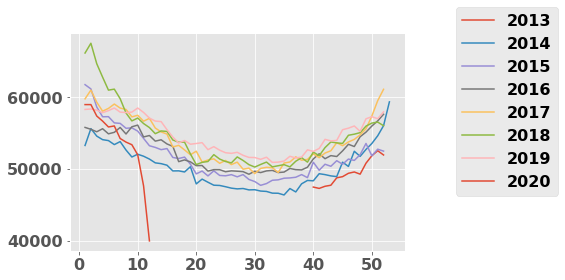

In [24]:
fig, ax = plt.subplots(1)


for year in years:
    mask = df_national['Calendar_Year'] == year
    df = df_national[mask].sort_values('Week')
    x = df['Week']
    y = df['Total_Deaths']

    
    ax.plot(x,y, label = year)
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)


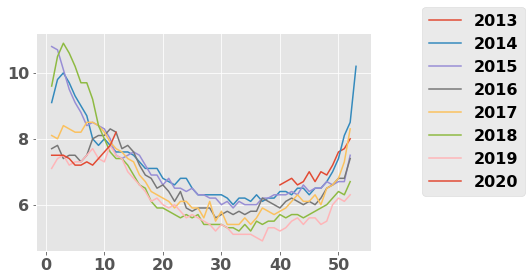

In [96]:
fig, ax = plt.subplots(1)


for year in years:
    mask = df_national['Calendar_Year'] == year
    df = df_national[mask].sort_values('Week')
    x = df['Week']
    y = df['Percent_P_I']

    
    ax.plot(x,y, label = year)
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)


## State Level Data Initial EDA

In [72]:
df_states.head()

,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
0,State,Alabama,All,2019-20,40,5.0,0,48,955,98.3%
1,State,Alabama,All,2019-20,41,3.8,0,36,940,96.8%
2,State,Alabama,All,2019-20,42,4.5,0,45,"1,011",> 100%
3,State,Alabama,All,2019-20,43,4.4,2,42,998,> 100%
4,State,Alabama,All,2019-20,44,5.7,2,53,962,99%


In [73]:
df_states.columns

Index(['AREA', 'SUB AREA', 'AGE GROUP', 'SEASON', 'WEEK', 'PERCENT P&I',
       'NUM INFLUENZA DEATHS', 'NUM PNEUMONIA DEATHS', 'TOTAL DEATHS',
       'PERCENT COMPLETE'],
      dtype='object')

In [74]:
df_states.columns = ['Area', 'State','Age_Group', 
                      'Season', 'Week'
                     ,'Percent_P_I', 'Num_Influenza_Deaths',
                     'Num_Pneumonia_Deaths','Total_Deaths', 'Percent_Complete']
#rename columns to remove spaces

In [75]:
df_states.columns

Index(['Area', 'State', 'Age_Group', 'Season', 'Week', 'Percent_P_I',
       'Num_Influenza_Deaths', 'Num_Pneumonia_Deaths', 'Total_Deaths',
       'Percent_Complete'],
      dtype='object')

In [76]:
df_states.head()

,Area,State,Age_Group,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete
0,State,Alabama,All,2019-20,40,5.0,0,48,955,98.3%
1,State,Alabama,All,2019-20,41,3.8,0,36,940,96.8%
2,State,Alabama,All,2019-20,42,4.5,0,45,"1,011",> 100%
3,State,Alabama,All,2019-20,43,4.4,2,42,998,> 100%
4,State,Alabama,All,2019-20,44,5.7,2,53,962,99%


In [77]:
df_states['Area'].unique()

array(['State'], dtype=object)

In [78]:
df_states['Age_Group'].unique()

array(['All'], dtype=object)

In [79]:
conditions = [
    df_states['Week']<40,
    df_states['Week']>=40    
]



In [80]:
df_states['First_Year'] = df_states['Season'].apply(lambda x: int(x[0:4])) 
df_states['Second_Year'] = df_states['Season'].apply(lambda x: int(x[0:4])+1) 


In [81]:
choices = [df_states['Second_Year'],df_states['First_Year']]


In [82]:
df_states['Calendar_Year'] = np.select(conditions,choices)

In [83]:
df_states.head()

,Area,State,Age_Group,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,First_Year,Second_Year,Calendar_Year
0,State,Alabama,All,2019-20,40,5.0,0,48,955,98.3%,2019,2020,2019
1,State,Alabama,All,2019-20,41,3.8,0,36,940,96.8%,2019,2020,2019
2,State,Alabama,All,2019-20,42,4.5,0,45,"1,011",> 100%,2019,2020,2019
3,State,Alabama,All,2019-20,43,4.4,2,42,998,> 100%,2019,2020,2019
4,State,Alabama,All,2019-20,44,5.7,2,53,962,99%,2019,2020,2019


In [58]:
# df_states.drop('First_Year', axis = 1, inplace = True)
# df_states.drop('Second_Year', axis = 1, inplace = True)
# df_states.drop('Age_Group', axis = 1, inplace = True)
# df_states.drop('Area', axis = 1, inplace = True)

In [84]:
df_states.describe()

,Week,Percent_P_I,First_Year,Second_Year,Calendar_Year
count,19604.000000,19587.000000,19604.000000,19604.000000,19604.000000
mean,25.933687,6.945260,2015.366048,2016.366048,2016.122016
std,15.236405,2.158992,2.116984,2.116984,2.089808
min,1.000000,0.000000,2012.000000,2013.000000,2013.000000
25%,12.000000,5.500000,2014.000000,2015.000000,2014.000000
50%,26.000000,6.700000,2015.000000,2016.000000,2016.000000
75%,39.000000,8.100000,2017.000000,2018.000000,2018.000000
max,53.000000,21.500000,2019.000000,2020.000000,2020.000000


In [85]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19604 entries, 0 to 19603
Data columns (total 13 columns):
Area                    19604 non-null object
State                   19604 non-null object
Age_Group               19604 non-null object
Season                  19604 non-null object
Week                    19604 non-null int64
Percent_P_I             19587 non-null float64
Num_Influenza_Deaths    19604 non-null object
Num_Pneumonia_Deaths    19604 non-null object
Total_Deaths            19604 non-null object
Percent_Complete        19604 non-null object
First_Year              19604 non-null int64
Second_Year             19604 non-null int64
Calendar_Year           19604 non-null int64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.9+ MB


In [86]:
df_states['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'New York City'],
      dtype=object)

In [87]:
mask = df_states['State'] == 'North Carolina'
df_nc = df_states[mask]

In [88]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19604 entries, 0 to 19603
Data columns (total 13 columns):
Area                    19604 non-null object
State                   19604 non-null object
Age_Group               19604 non-null object
Season                  19604 non-null object
Week                    19604 non-null int64
Percent_P_I             19587 non-null float64
Num_Influenza_Deaths    19604 non-null object
Num_Pneumonia_Deaths    19604 non-null object
Total_Deaths            19604 non-null object
Percent_Complete        19604 non-null object
First_Year              19604 non-null int64
Second_Year             19604 non-null int64
Calendar_Year           19604 non-null int64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.9+ MB


In [95]:
df_nc[df_nc['Calendar_Year']== 2020]

,Area,State,Age_Group,Season,Week,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,First_Year,Second_Year,Calendar_Year
838,State,North Carolina,All,2019-20,1,6.6,9,120,"1,952",> 100%,2019,2020,2020
839,State,North Carolina,All,2019-20,2,7.3,16,127,"1,950",> 100%,2019,2020,2020
840,State,North Carolina,All,2019-20,3,7.6,11,126,"1,806",> 100%,2019,2020,2020
841,State,North Carolina,All,2019-20,4,7.1,11,115,"1,780",> 100%,2019,2020,2020
842,State,North Carolina,All,2019-20,5,6.4,11,88,"1,536",90.9%,2019,2020,2020
843,State,North Carolina,All,2019-20,6,6.6,7,75,"1,241",73.4%,2019,2020,2020
844,State,North Carolina,All,2019-20,7,7.6,2,25,356,21.1%,2019,2020,2020
845,State,North Carolina,All,2019-20,8,NaN,Insufficient Data,Insufficient Data,Insufficient Data,< 20%,2019,2020,2020
846,State,North Carolina,All,2019-20,9,NaN,Insufficient Data,Insufficient Data,Insufficient Data,< 20%,2019,2020,2020
847,State,North Carolina,All,2019-20,10,NaN,Insufficient Data,Insufficient Data,Insufficient Data,< 20%,2019,2020,2020
